In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression

from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay
)

In [43]:
import kagglehub
import pandas as pd
import os

# Descargar el dataset usando kagglehub
# El nombre del dataset es 'prachi13/customer-analytics' de la URL proporcionada.
path = kagglehub.dataset_download("prachi13/customer-analytics")

print(f"Ruta a los archivos del dataset: {path}")

# Listar los archivos en el directorio descargado para encontrar el CSV
csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]

if csv_files:
    # Asumiendo que el dataset relevante es el primero .csv encontrado
    file_name = csv_files[0]
    full_file_path = os.path.join(path, file_name)

    df = pd.read_csv(full_file_path)
    print(f"Dataset '{file_name}' cargado exitosamente. Mostrando las primeras 5 filas:")
    display(df.head())
else:
    print(f"Error: No se encontraron archivos .csv en el directorio: {path}. Por favor, verifica el contenido del dataset descargado.")

Using Colab cache for faster access to the 'customer-analytics' dataset.
Ruta a los archivos del dataset: /kaggle/input/customer-analytics
Dataset 'Train.csv' cargado exitosamente. Mostrando las primeras 5 filas:


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [44]:
df.head(5)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [45]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


Verificamos que el target es el REACHED.ON.TIME Osea el alcanzado a tiempo Ya que definimos que al cliente le llego a tiempo sus pedidos

In [46]:
target_clasificacion = "Cost_of_the_Product"

df[target_clasificacion].value_counts()

,count
Cost_of_the_Product,
245,110
257,109
260,106
254,101
264,100
...,...
96,5
120,5
99,5


In [47]:
target_regresion = "Reached.on.Time_Y.N"
df[target_regresion].value_counts()


,count
Reached.on.Time_Y.N,
1,6563
0,4436


In [48]:
df["Product_importance"].value_counts()

,count
Product_importance,
low,5297
medium,4754
high,948


In [49]:
df["Mode_of_Shipment"].value_counts()

,count
Mode_of_Shipment,
Ship,7462
Flight,1777
Road,1760


In [50]:
df["Warehouse_block"].value_counts()

,count
Warehouse_block,
F,3666
D,1834
A,1833
B,1833
C,1833


In [51]:
ordinal_encoder = OrdinalEncoder(categories=[['low', 'medium', 'high']])
df['Product_importance_encoded'] = ordinal_encoder.fit_transform(df[['Product_importance']])

print("Valores únicos de 'Product_importance_encoded':")
print(df['Product_importance_encoded'].value_counts())
display(df.head())

Valores únicos de 'Product_importance_encoded':
Product_importance_encoded
0.0    5297
1.0    4754
2.0     948
Name: count, dtype: int64


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Product_importance_encoded
0,1,D,Flight,4,2,177,3,low,F,44,1233,1,0.0
1,2,F,Flight,4,5,216,2,low,M,59,3088,1,0.0
2,3,A,Flight,2,2,183,4,low,M,48,3374,1,0.0
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1,1.0
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1,1.0


In [52]:
df_encoded = df.drop(columns=['Product_importance'])
display(df_encoded.head())

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Product_importance_encoded
0,1,D,Flight,4,2,177,3,F,44,1233,1,0.0
1,2,F,Flight,4,5,216,2,M,59,3088,1,0.0
2,3,A,Flight,2,2,183,4,M,48,3374,1,0.0
3,4,B,Flight,3,3,176,4,M,10,1177,1,1.0
4,5,C,Flight,2,2,184,3,F,46,2484,1,1.0


In [53]:
caracteristicas_categoricas_ohe = ['Warehouse_block', 'Mode_of_Shipment', 'Gender']

preprocesador_ohe = ColumnTransformer(
    transformers=[
        ('one_hot', OneHotEncoder(handle_unknown='ignore', sparse_output=False), caracteristicas_categoricas_ohe)
    ],
    remainder='passthrough' # Mantener otras columnas como están
)

# Aplicar el preprocesador a df_encoded
df_procesado = preprocesador_ohe.fit_transform(df_encoded)

# Obtener nombres de características después de one-hot encoding
nombres_caracteristicas_ohe = preprocesador_ohe.named_transformers_['one_hot'].get_feature_names_out(caracteristicas_categoricas_ohe)

# Obtener nombres de las características restantes
caracteristicas_restantes = [col for col in df_encoded.columns if col not in caracteristicas_categoricas_ohe]

# Combinar todos los nombres de características
todos_nombres_caracteristicas = list(nombres_caracteristicas_ohe) + caracteristicas_restantes

# Crear un nuevo DataFrame con los datos procesados y los nombres de columna correctos
df_cleaned = pd.DataFrame(df_procesado, columns=todos_nombres_caracteristicas)

# Asegurarse de que 'Product_importance_encoded' sea numérico
df_cleaned['Product_importance_encoded'] = pd.to_numeric(df_cleaned['Product_importance_encoded'], errors='coerce')

# Convertir las columnas codificadas a enteros (0 o 1)
for col in nombres_caracteristicas_ohe:
    df_cleaned[col] = df_cleaned[col].astype(int)

display(df_cleaned.head())

,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Gender_F,Gender_M,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Product_importance_encoded
0,0,0,0,1,0,1,0,0,1,0,1.0,4.0,2.0,177.0,3.0,44.0,1233.0,1.0,0.0
1,0,0,0,0,1,1,0,0,0,1,2.0,4.0,5.0,216.0,2.0,59.0,3088.0,1.0,0.0
2,1,0,0,0,0,1,0,0,0,1,3.0,2.0,2.0,183.0,4.0,48.0,3374.0,1.0,0.0
3,0,1,0,0,0,1,0,0,0,1,4.0,3.0,3.0,176.0,4.0,10.0,1177.0,1.0,1.0
4,0,0,1,0,0,1,0,0,1,0,5.0,2.0,2.0,184.0,3.0,46.0,2484.0,1.0,1.0


# PREPROCESAMIENTO

#EDA
Analis exploratorio de datos

In [54]:
df_cleaned = df_cleaned.drop(columns=['ID'])
display(df_cleaned.head())

,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Gender_F,Gender_M,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Product_importance_encoded
0,0,0,0,1,0,1,0,0,1,0,4.0,2.0,177.0,3.0,44.0,1233.0,1.0,0.0
1,0,0,0,0,1,1,0,0,0,1,4.0,5.0,216.0,2.0,59.0,3088.0,1.0,0.0
2,1,0,0,0,0,1,0,0,0,1,2.0,2.0,183.0,4.0,48.0,3374.0,1.0,0.0
3,0,1,0,0,0,1,0,0,0,1,3.0,3.0,176.0,4.0,10.0,1177.0,1.0,1.0
4,0,0,1,0,0,1,0,0,1,0,2.0,2.0,184.0,3.0,46.0,2484.0,1.0,1.0


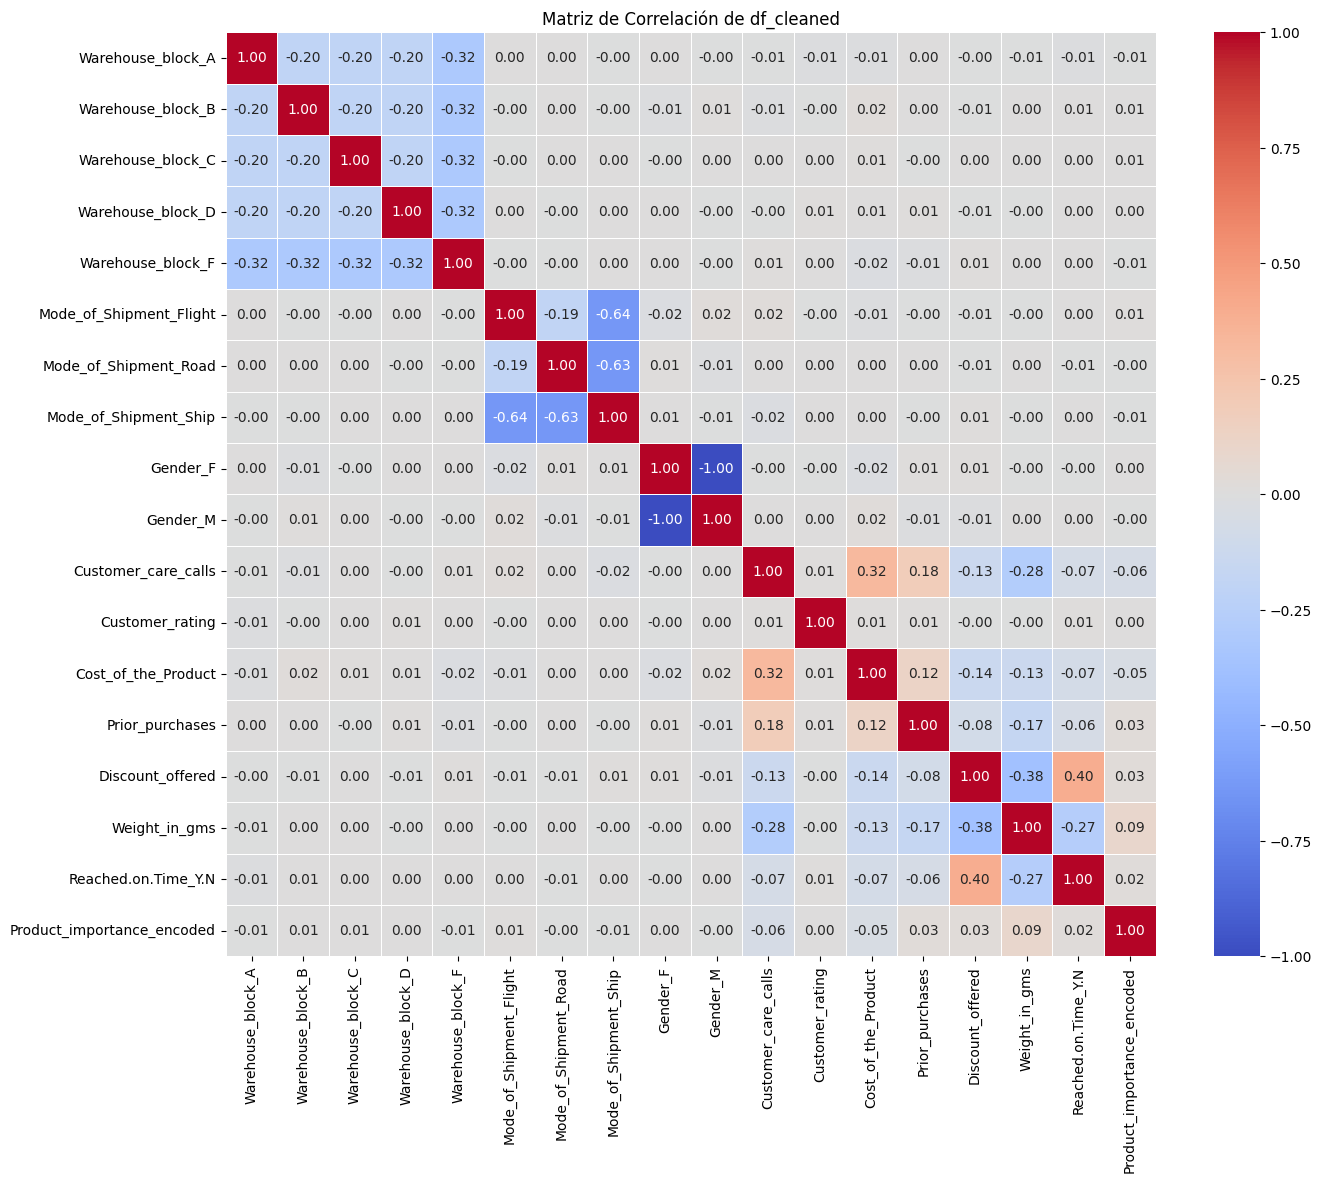

In [55]:
plt.figure(figsize=(15, 12))
sns.heatmap(df_cleaned.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Matriz de Correlación de df_cleaned')
plt.show()

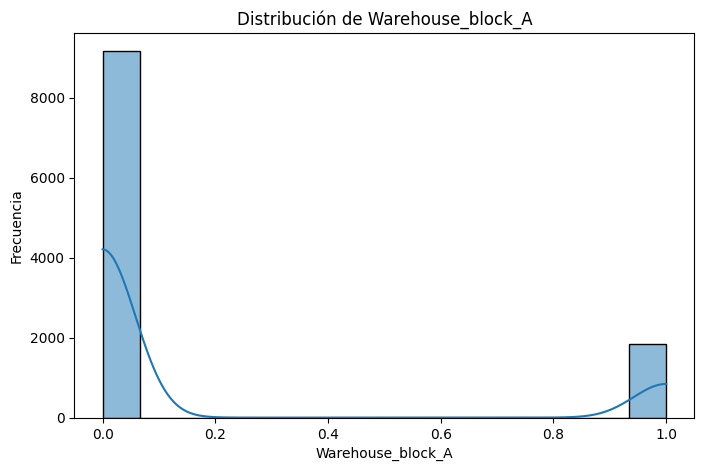

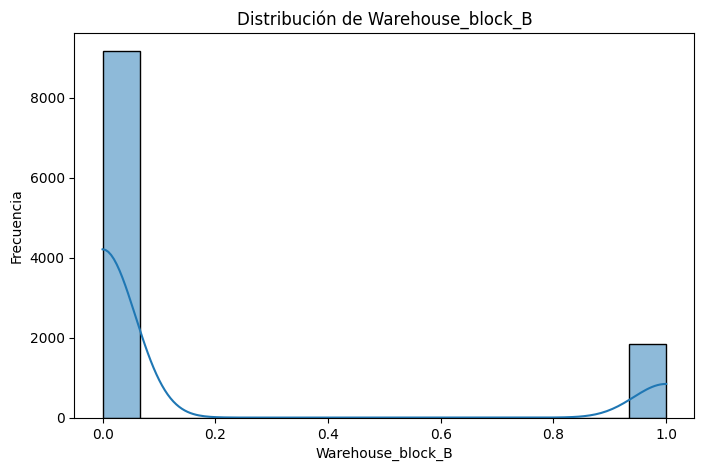

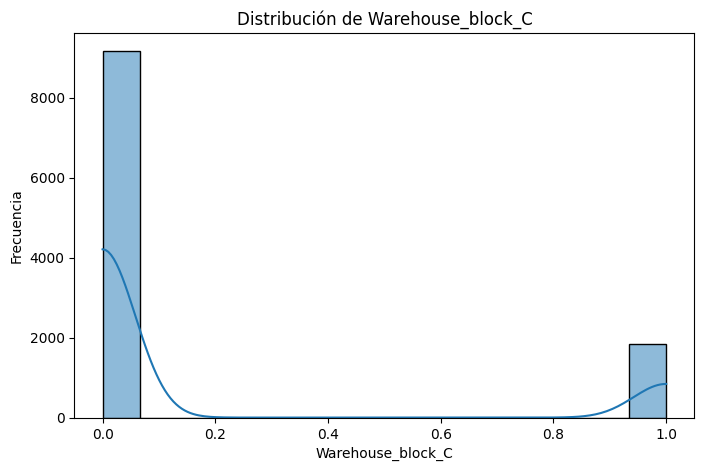

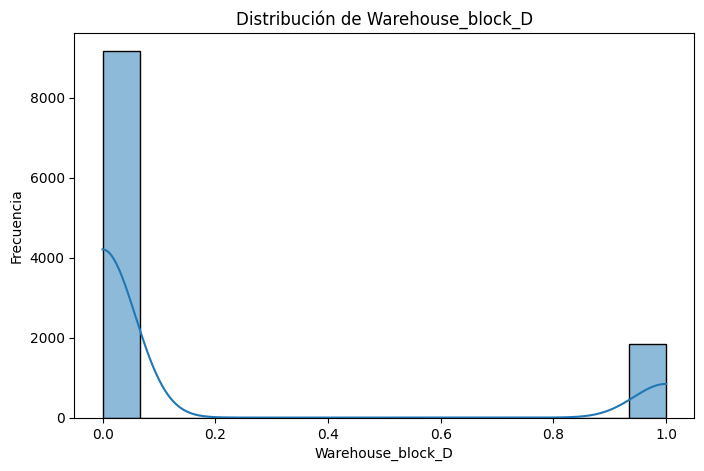

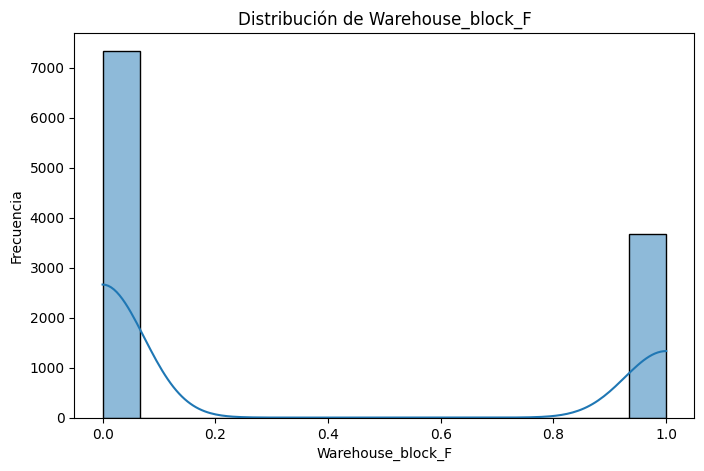

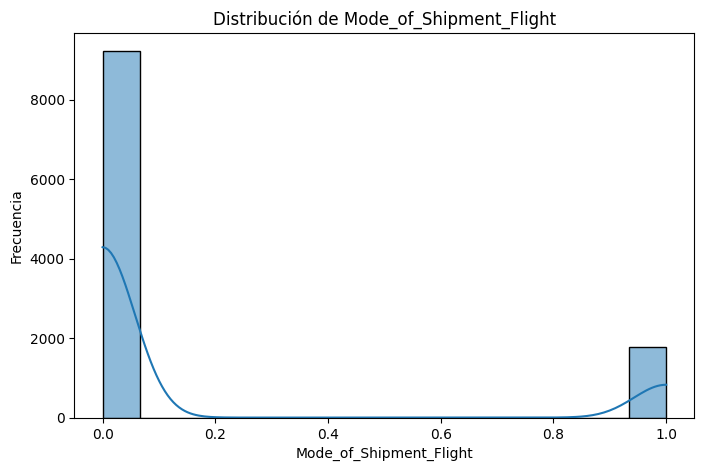

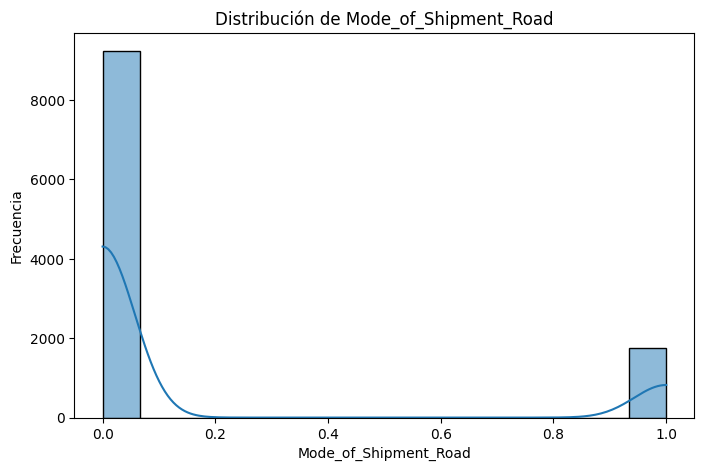

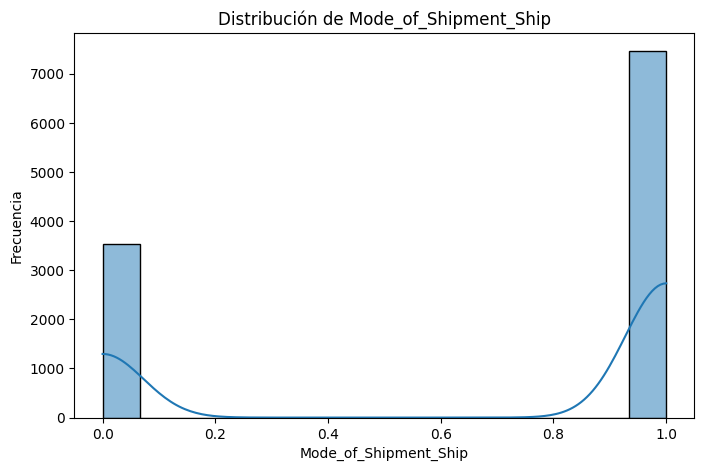

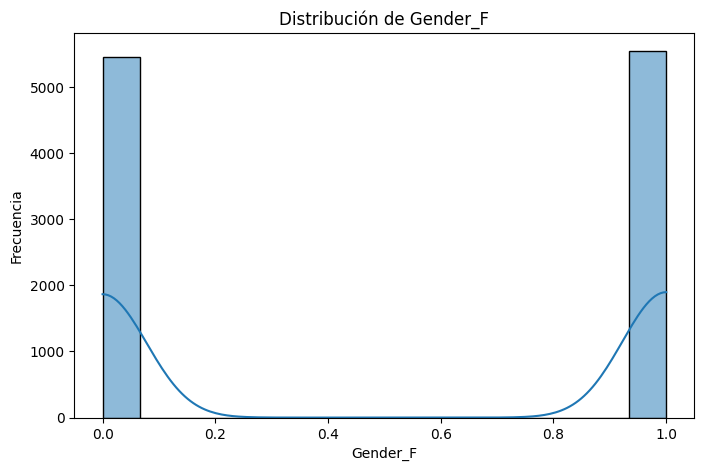

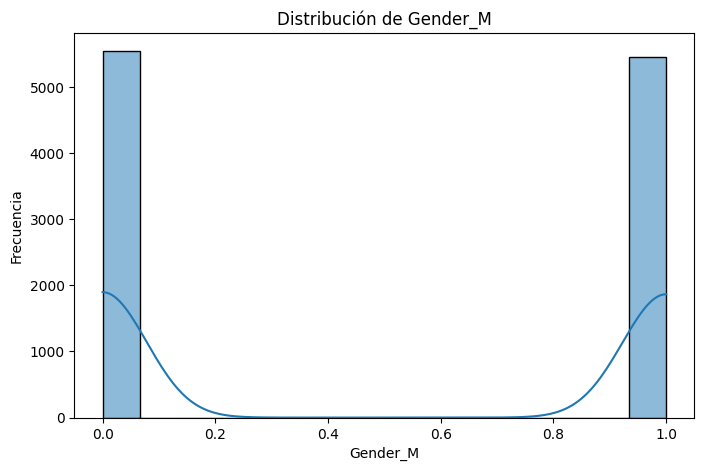

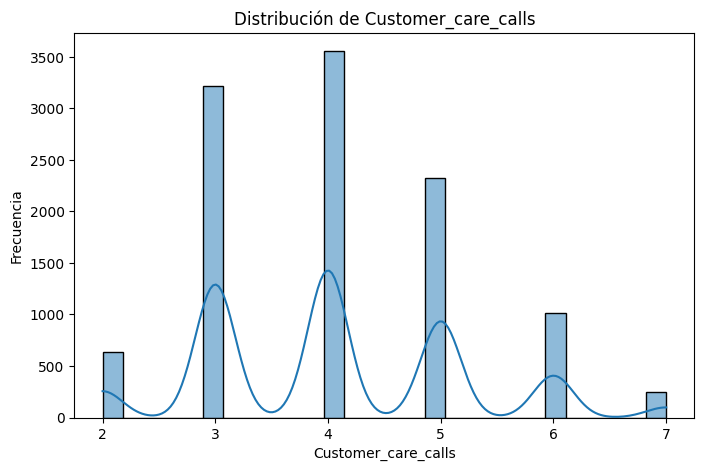

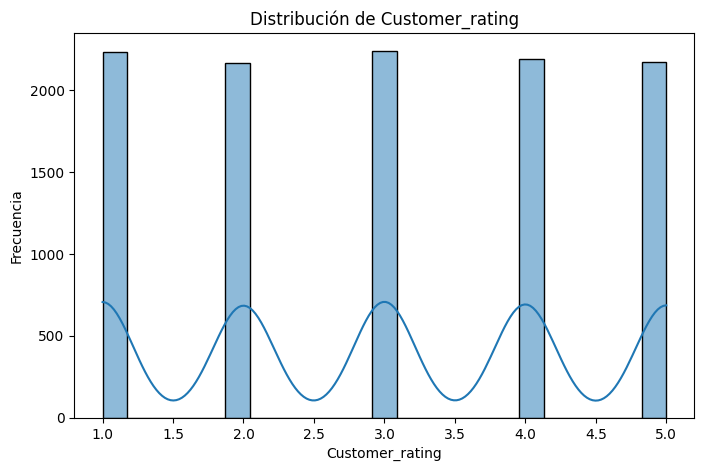

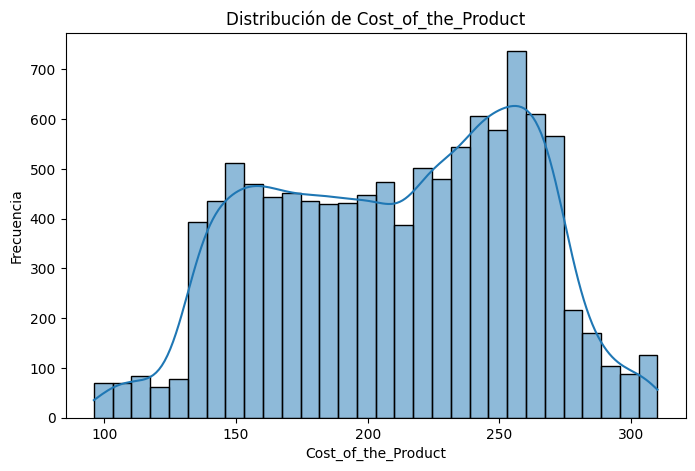

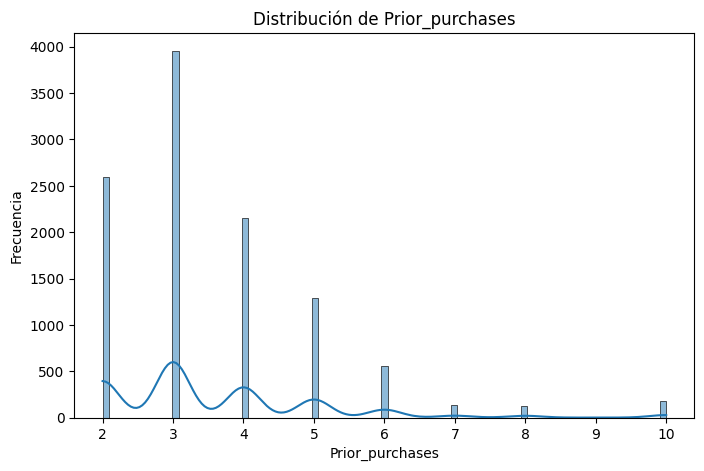

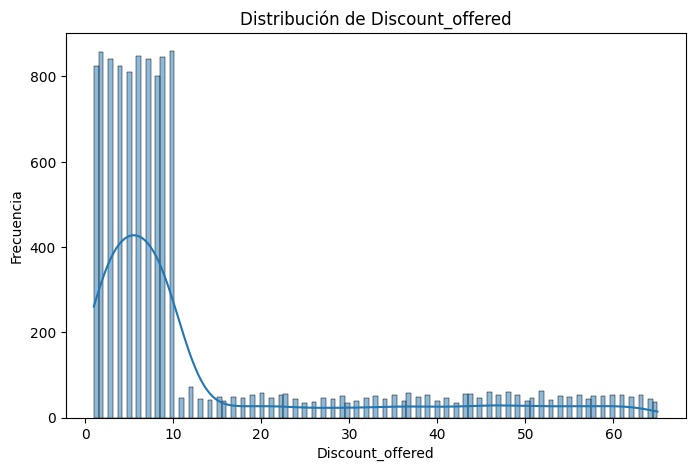

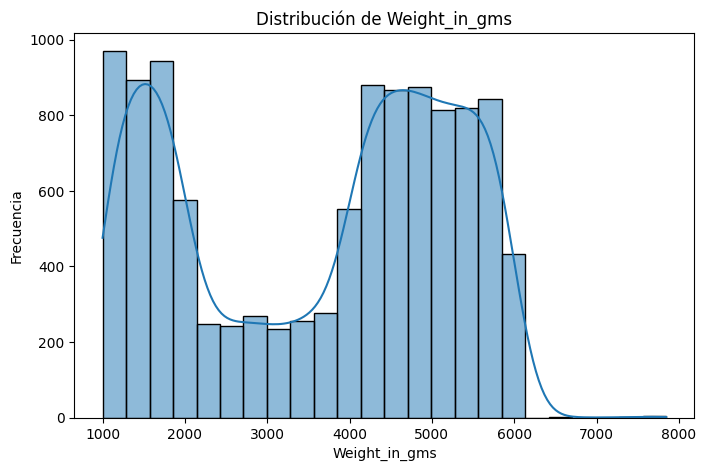

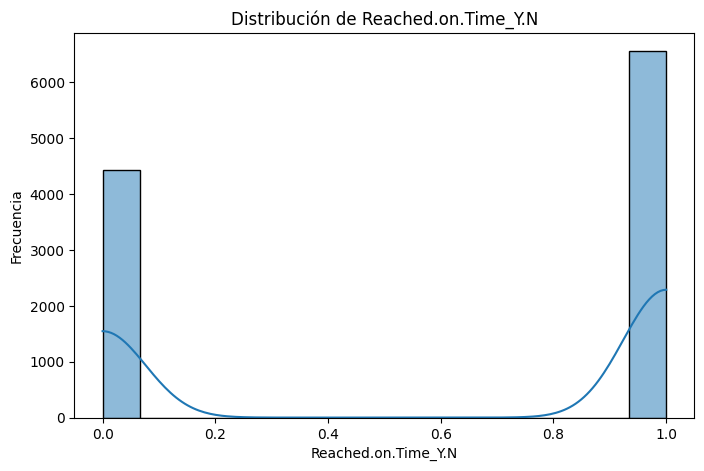

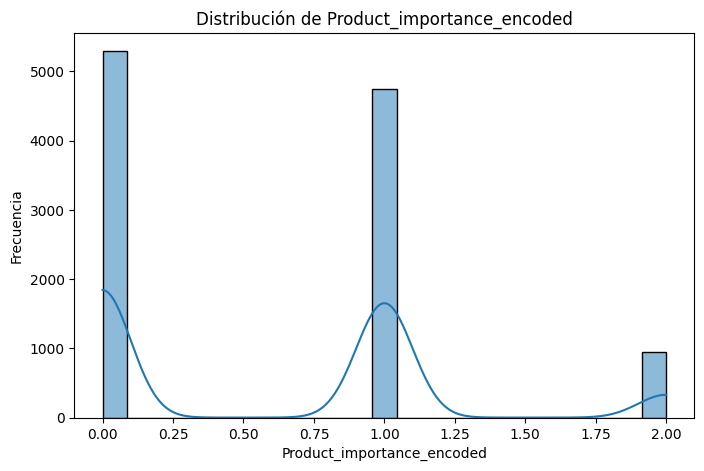

In [20]:
for col in df_cleaned.select_dtypes(include=np.number).columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df_cleaned[col], kde=True)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

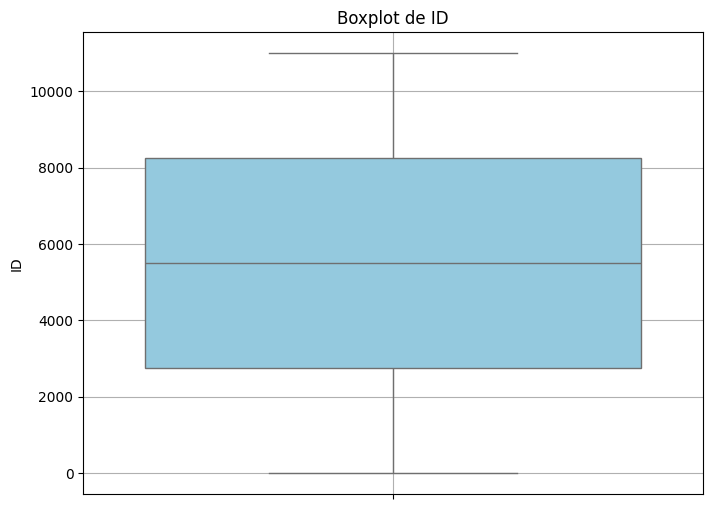

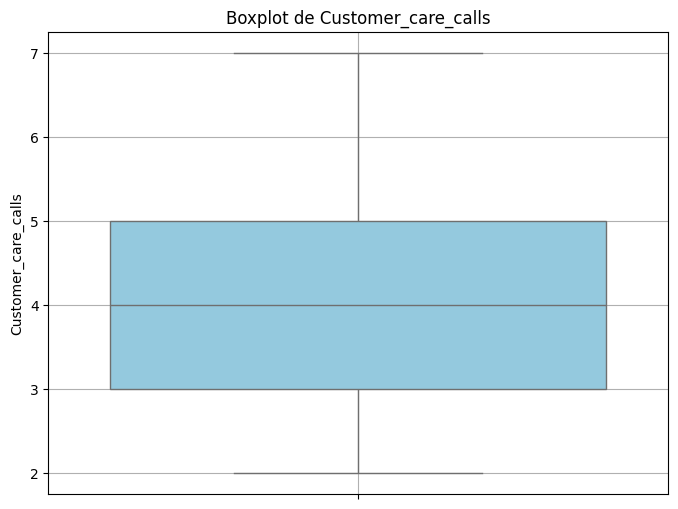

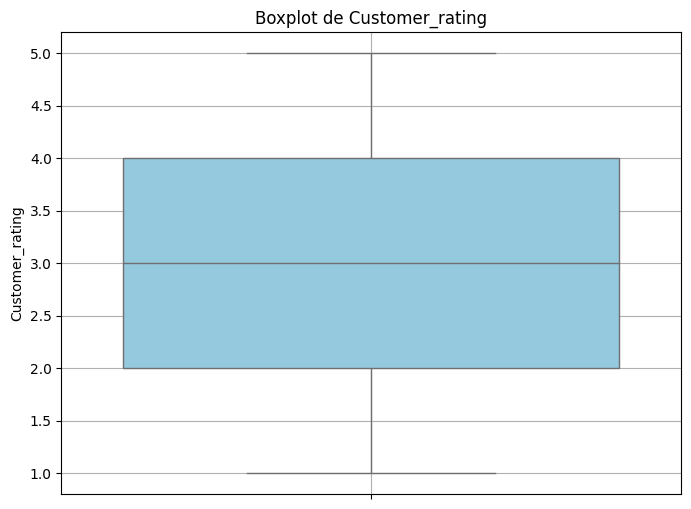

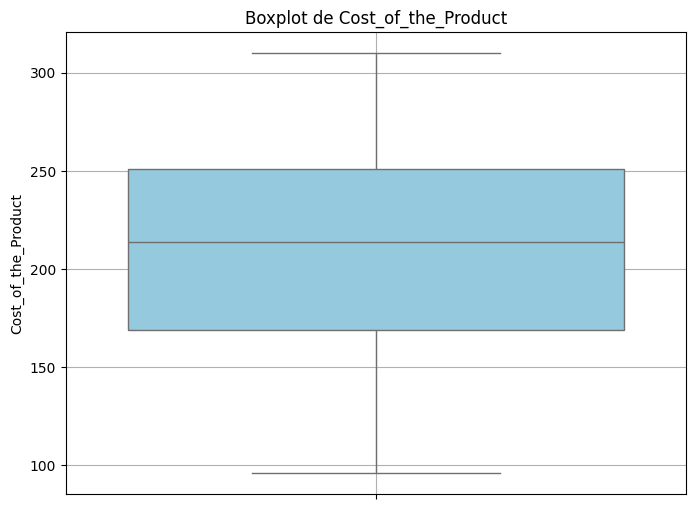

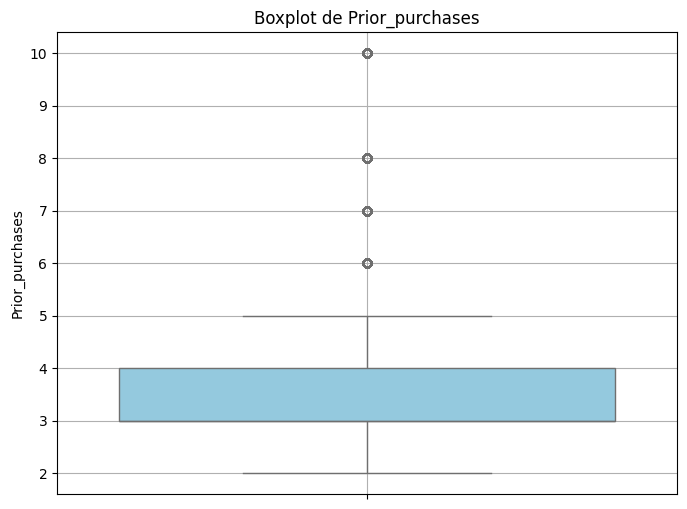

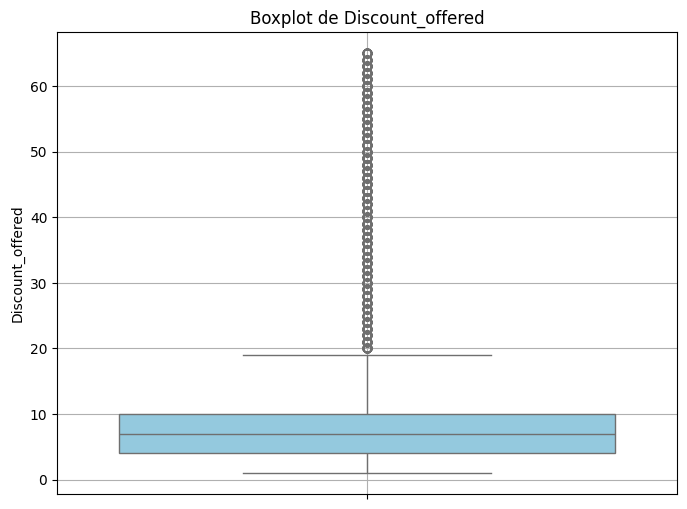

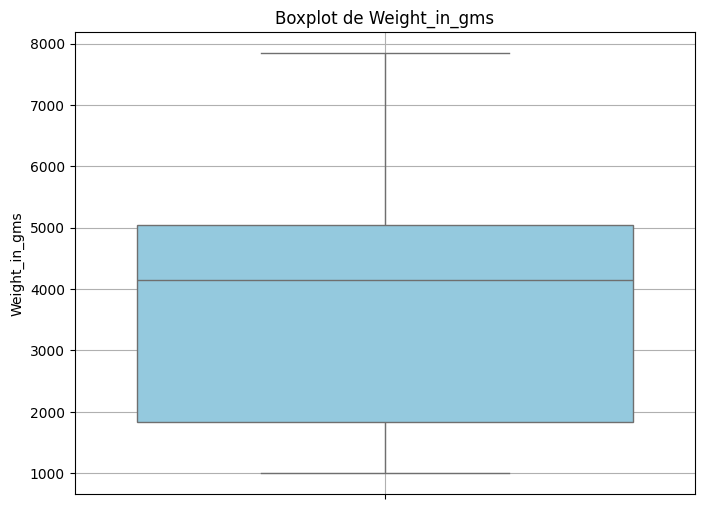

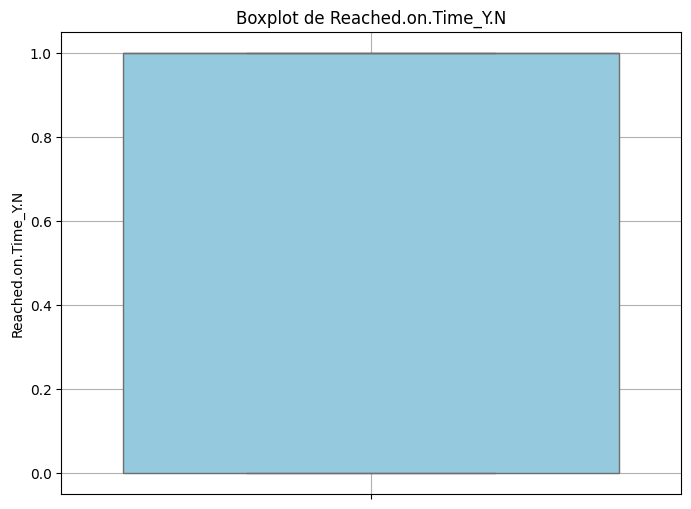

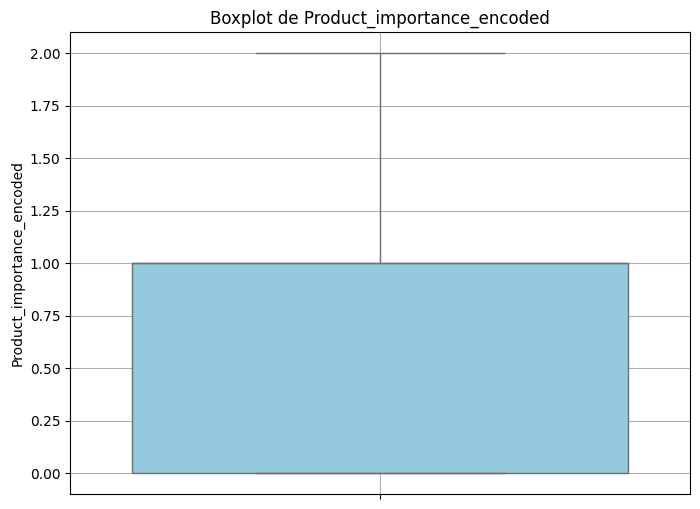

In [22]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns


for column in numeric_columns:
    plt.figure(figsize=(8, 6)) # Adjust figure size as needed
    sns.boxplot(y=df[column], color='skyblue')  # Boxplot vertical
    plt.title(f'Boxplot de {column}')
    plt.ylabel(column)
    plt.grid(True)
    plt.show()

##Estandarizacion

In [60]:
from sklearn.preprocessing import StandardScaler

# Identificar todas las columnas numéricas en df_cleaned
numerical_cols_to_standardize = df_cleaned.columns

# Inicializar el StandardScaler
scaler = StandardScaler()

# Ajustar y transformar el DataFrame
df_standardized_array = scaler.fit_transform(df_cleaned[numerical_cols_to_standardize])

# Crear un nuevo DataFrame con los datos estandarizados y los nombres de columna originales
df_standardized = pd.DataFrame(df_standardized_array, columns=numerical_cols_to_standardize)

print("DataFrame estandarizado (df_standardized) creado. Primeras 5 filas:")
display(df_standardized.head())

print("\nNota: Esta estandarización se aplicó a todo el DataFrame antes de cualquier división de datos. Para tareas de Machine Learning, es una buena práctica estandarizar los datos *después* de dividirlos en conjuntos de entrenamiento y prueba para evitar la fuga de datos del conjunto de prueba al entrenamiento.")

DataFrame estandarizado (df_standardized) creado. Primeras 5 filas:


,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Gender_F,Gender_M,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Product_importance_encoded
0,-0.447189,-0.447189,-0.447189,2.235458,-0.707059,2.278079,-0.436459,-1.45248,0.991760,-0.991760,-0.047711,-0.700755,-0.690722,-0.372735,1.889983,-1.468240,0.822138,-0.942576
1,-0.447189,-0.447189,-0.447189,-0.447336,1.414310,2.278079,-0.436459,-1.45248,-1.008308,1.008308,-0.047711,1.421578,0.120746,-1.029424,2.815636,-0.333893,0.822138,-0.942576
2,2.236190,-0.447189,-0.447189,-0.447336,-0.707059,2.278079,-0.436459,-1.45248,-1.008308,1.008308,-1.799887,-0.700755,-0.565881,0.283954,2.136824,-0.159002,0.822138,-0.942576
3,-0.447189,2.236190,-0.447189,-0.447336,-0.707059,2.278079,-0.436459,-1.45248,-1.008308,1.008308,-0.923799,0.006689,-0.711529,0.283954,-0.208162,-1.502484,0.822138,0.616430
4,-0.447189,-0.447189,2.236190,-0.447336,-0.707059,2.278079,-0.436459,-1.45248,0.991760,-0.991760,-1.799887,-0.700755,-0.545074,-0.372735,2.013404,-0.703244,0.822138,0.616430



Nota: Esta estandarización se aplicó a todo el DataFrame antes de cualquier división de datos. Para tareas de Machine Learning, es una buena práctica estandarizar los datos *después* de dividirlos en conjuntos de entrenamiento y prueba para evitar la fuga de datos del conjunto de prueba al entrenamiento.


## Regresion lineal en cost of the product

In [61]:
# Define features (X) and target (y) for 'Cost_of_the_Product' using the standardized DataFrame
X = df_standardized.drop(columns=['Cost_of_the_Product'])
y = df_standardized['Cost_of_the_Product']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (8799, 17)
y_train shape: (8799,)
X_test shape: (2200, 17)
y_test shape: (2200,)


In [65]:
linear_model_cost = Pipeline([
    ("model", LinearRegression())
])

linear_model_cost.fit(X_train, y_train)

y_pred_linear_cost = linear_model_cost.predict(X_test)

mae_linear_cost = mean_absolute_error(y_test, y_pred_linear_cost)
rmse_linear_cost = np.sqrt(mean_squared_error(y_test, y_pred_linear_cost))

print("=== REGRESIÓN LINEAL para Cost_of_the_Product ===")
print("MAE:", mae_linear_cost)
print("RMSE:", rmse_linear_cost)

=== REGRESIÓN LINEAL para Cost_of_the_Product ===
MAE: 0.7684439144053316
RMSE: 0.9270816848123246


In [66]:
from sklearn.metrics import r2_score

r2_linear_cost = r2_score(y_test, y_pred_linear_cost)
print(f"R-squared para el modelo de Regresión Lineal (Cost_of_the_Product): {r2_linear_cost:.4f}")

R-squared para el modelo de Regresión Lineal (Cost_of_the_Product): 0.1043


Considerando las métricas obtenidas (R² = 0.1043, MAE ≈ 0.768 y RMSE ≈ 0.927), se observa que el modelo de regresión lineal presenta una baja capacidad explicativa, ya que solo logra explicar aproximadamente el 10% de la variabilidad del costo del producto.

Si bien los valores de MAE y RMSE parecen bajos, estos se encuentran en una escala estandarizada, por lo que representan errores relativos dentro de la distribución transformada del target. A pesar de ello, el valor reducido de R² confirma que el modelo no está capturando adecuadamente la relación entre las variables predictoras y el costo del producto.

La similitud en el desempeño sugiere que el problema no radica en la optimización del modelo, sino en la limitada capacidad informativa del dataset. Para mejorar la predicción, sería necesario incorporar nuevas características más directamente relacionadas con la formación del precio (como categoría del producto, tipo, calidad, marca u otros atributos comerciales) o emplear modelos no lineales capaces de capturar relaciones más complejas entre las variables.

## Regresion con metodo Rigde

In [67]:
ridge_model = Pipeline([
    ("model", Ridge(alpha=1.0))
])

ridge_model.fit(X_train, y_train)

y_pred_ridge = ridge_model.predict(X_test)

mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

print("=== RIDGE para Cost_of_the_Product ===")
print("MAE:", mae_ridge)
print("RMSE:", rmse_ridge)

=== RIDGE para Cost_of_the_Product ===
MAE: 0.7684470088008504
RMSE: 0.9270805533969078


## Comparacion entre ambos de Linear y Ridge

In [68]:
comparison = pd.DataFrame({
    "Modelo": ["Linear Regression", "Ridge"],
    "MAE": [mae_linear_cost, mae_ridge],
    "RMSE": [rmse_linear_cost, rmse_ridge]
})

comparison

,Modelo,MAE,RMSE
0,Linear Regression,0.768444,0.927082
1,Ridge,0.768447,0.927081


##Lasso


In [69]:
from sklearn.linear_model import Lasso

lasso_model = Pipeline([
    ("model", Lasso(alpha=1.0, max_iter=1000))
])

lasso_model.fit(X_train, y_train)

y_pred_lasso = lasso_model.predict(X_test)

mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))

print("=== LASSO para Cost_of_the_Product ===")
print("MAE:", mae_lasso)
print("RMSE:", rmse_lasso)

=== LASSO para Cost_of_the_Product ===
MAE: 0.836568147971988
RMSE: 0.9797301650891003


In [70]:
comparison = pd.concat([comparison, pd.DataFrame([{"Modelo": "Lasso", "MAE": mae_lasso, "RMSE": rmse_lasso}])], ignore_index=True)
display(comparison)

,Modelo,MAE,RMSE
0,Linear Regression,0.768444,0.927082
1,Ridge,0.768447,0.927081
2,Lasso,0.836568,0.979730


Todos los modelos evaluados, incluyendo la regresión lineal regularizada con Ridge y Lasso, presentan resultados muy similares en términos de desempeño. Esto sugiere que la limitación principal no radica en el tipo de modelo utilizado, sino en la capacidad explicativa del dataset.

En otras palabras, las variables disponibles no contienen suficiente información relevante para predecir adecuadamente el costo del producto, por lo que cambiar o regularizar el modelo no genera mejoras significativas.

##Clasificacion

In [75]:
# Define features (X_clf) from the standardized DataFrame
X_clf = df_standardized.drop(columns=['Reached.on.Time_Y.N'])

# Define target (y_clf) from the *cleaned* (non-standardized) DataFrame to keep discrete labels
y_clf = df_cleaned['Reached.on.Time_Y.N']

# Split the data into training and testing sets for classification
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42, stratify=y_clf)

print(f"X_train_clf shape: {X_train_clf.shape}")
print(f"y_train_clf shape: {y_train_clf.shape}")
print(f"X_test_clf shape: {X_test_clf.shape}")
print(f"y_test_clf shape: {y_test_clf.shape}")

X_train_clf shape: (8799, 17)
y_train_clf shape: (8799,)
X_test_clf shape: (2200, 17)
y_test_clf shape: (2200,)


=== CLASIFICACIÓN con ÁRBOLES DE DECISIÓN ===
Precisión: 0.6409

Matriz de Confusión:
[[471 416]
 [374 939]]

Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.56      0.53      0.54       887
         1.0       0.69      0.72      0.70      1313

    accuracy                           0.64      2200
   macro avg       0.63      0.62      0.62      2200
weighted avg       0.64      0.64      0.64      2200



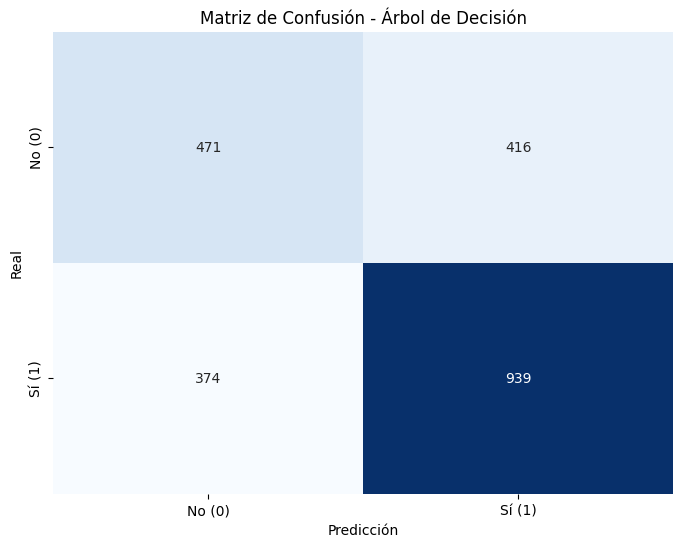

In [76]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Since df_standardized is already used for X_clf, no further scaling is needed in the pipeline.
modelo_arbol_decision = Pipeline([
    ("modelo", DecisionTreeClassifier(random_state=42))
])

modelo_arbol_decision.fit(X_train_clf, y_train_clf)

y_pred_dt = modelo_arbol_decision.predict(X_test_clf)

# Evaluar el modelo
precision_dt = accuracy_score(y_test_clf, y_pred_dt)
matriz_confusion_dt = confusion_matrix(y_test_clf, y_pred_dt)
reporte_clasificacion_dt = classification_report(y_test_clf, y_pred_dt)

print("=== CLASIFICACIÓN con ÁRBOLES DE DECISIÓN ===")
print(f"Precisión: {precision_dt:.4f}")
print("\nMatriz de Confusión:")
print(matriz_confusion_dt)
print("\nReporte de Clasificación:")
print(reporte_clasificacion_dt)

# Visualizar Matriz de Confusión
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion_dt, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No (0)', 'Sí (1)'], yticklabels=['No (0)', 'Sí (1)'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Árbol de Decisión')
plt.show()